In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv'

In [3]:
df = pd.read_csv(url, sep=';')

In [4]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [5]:
df.describe()

,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord
count,6000.000000,6000.000000,6000.000000
mean,0.492000,104.712167,4.512833
std,0.499978,24.225196,6.735730
min,0.000000,33.000000,-39.000000
25%,0.000000,80.000000,0.000000
50%,0.000000,106.000000,3.000000
75%,1.000000,112.000000,7.000000
max,1.000000,151.000000,64.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   TurId                                      6000 non-null   object
 1   Dato                                       6000 non-null   object
 2   Fylke                                      6000 non-null   object
 3   Område                                     6000 non-null   object
 4   Kommune                                    6000 non-null   object
 5   Holdeplass_Fra                             6000 non-null   object
 6   Holdeplass_Til                             6000 non-null   object
 7   Linjetype                                  6000 non-null   object
 8   Linjefylke                                 6000 non-null   object
 9   Linjenavn                                  6000 non-null   object
 10  Linjeretning                        

In [7]:
df=df.replace(r'^\s*$', np.nan, regex=True)


In [8]:
df.isna().sum()

TurId                                        0
Dato                                         0
Fylke                                        0
Område                                       0
Kommune                                      0
Holdeplass_Fra                               0
Holdeplass_Til                               0
Linjetype                                    0
Linjefylke                                   0
Linjenavn                                    0
Linjeretning                                 0
Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra     0
Tidspunkt_Faktisk_Avgang_Holdeplass_Fra      0
Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra    0
Tidspunkt_Planlagt_Avgang_Holdeplass_Fra     0
Kjøretøy_Kapasitet                           0
Passasjerer_Ombord                           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   TurId                                      6000 non-null   object
 1   Dato                                       6000 non-null   object
 2   Fylke                                      6000 non-null   object
 3   Område                                     6000 non-null   object
 4   Kommune                                    6000 non-null   object
 5   Holdeplass_Fra                             6000 non-null   object
 6   Holdeplass_Til                             6000 non-null   object
 7   Linjetype                                  6000 non-null   object
 8   Linjefylke                                 6000 non-null   object
 9   Linjenavn                                  6000 non-null   object
 10  Linjeretning                        

In [10]:
df['Fylke'] = df['Fylke'] == 'Viken'

In [11]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,True,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,True,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,True,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,True,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,True,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [12]:
df.describe()

,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord
count,6000.000000,6000.000000,6000.000000
mean,0.492000,104.712167,4.512833
std,0.499978,24.225196,6.735730
min,0.000000,33.000000,-39.000000
25%,0.000000,80.000000,0.000000
50%,0.000000,106.000000,3.000000
75%,1.000000,112.000000,7.000000
max,1.000000,151.000000,64.000000


In [13]:
housing_map = {'True': 1, 'False': 0}
df['Fylke'] = df['Fylke'].map(housing_map)

In [14]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,NaN,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,NaN,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,NaN,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,NaN,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,NaN,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [15]:
df.isna().sum()

TurId                                           0
Dato                                            0
Fylke                                        6000
Område                                          0
Kommune                                         0
Holdeplass_Fra                                  0
Holdeplass_Til                                  0
Linjetype                                       0
Linjefylke                                      0
Linjenavn                                       0
Linjeretning                                    0
Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra        0
Tidspunkt_Faktisk_Avgang_Holdeplass_Fra         0
Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra       0
Tidspunkt_Planlagt_Avgang_Holdeplass_Fra        0
Kjøretøy_Kapasitet                              0
Passasjerer_Ombord                              0
dtype: int64

In [16]:
df = pd.read_csv(url, sep=';')

In [17]:
df['Fylke'] = df['Fylke'] == 'Viken'

In [18]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,True,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,True,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,True,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,True,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,True,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [19]:
df["Fylke"] = df["Fylke"].astype(int)

In [20]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,1,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,1,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,1,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,1,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,1,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [21]:
df.describe()

,Fylke,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.743667,0.492000,104.712167,4.512833
std,0.436644,0.499978,24.225196,6.735730
min,0.000000,0.000000,33.000000,-39.000000
25%,0.000000,0.000000,80.000000,0.000000
50%,1.000000,0.000000,106.000000,3.000000
75%,1.000000,1.000000,112.000000,7.000000
max,1.000000,1.000000,151.000000,64.000000


In [22]:
df['Område'] = df['Område'] == 'Vest'

In [23]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,1,True,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,1,True,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,1,True,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,1,True,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,1,True,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [24]:
df["Område"] = df["Område"].astype(int)

In [25]:
df.describe()

,Fylke,Område,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.743667,0.217833,0.492000,104.712167,4.512833
std,0.436644,0.412808,0.499978,24.225196,6.735730
min,0.000000,0.000000,0.000000,33.000000,-39.000000
25%,0.000000,0.000000,0.000000,80.000000,0.000000
50%,1.000000,0.000000,0.000000,106.000000,3.000000
75%,1.000000,0.000000,1.000000,112.000000,7.000000
max,1.000000,1.000000,1.000000,151.000000,64.000000


In [26]:
df = df[df['Passasjerer_Ombord'] >= 0]  

In [27]:
df.describe()

,Fylke,Område,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord
count,5333.000000,5333.000000,5333.000000,5333.000000,5333.000000
mean,0.734108,0.204763,0.475530,105.052503,5.601163
std,0.441848,0.403566,0.499448,24.255181,6.160011
min,0.000000,0.000000,0.000000,33.000000,0.000000
25%,0.000000,0.000000,0.000000,80.000000,1.000000
50%,1.000000,0.000000,0.000000,106.000000,4.000000
75%,1.000000,0.000000,1.000000,112.000000,8.000000
max,1.000000,1.000000,1.000000,151.000000,64.000000


In [28]:
df[Fylke].plot.line()

NameError: name 'Fylke' is not defined

<AxesSubplot:>

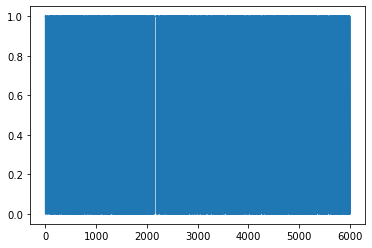

In [29]:
df['Fylke'].plot.line()

<AxesSubplot:>

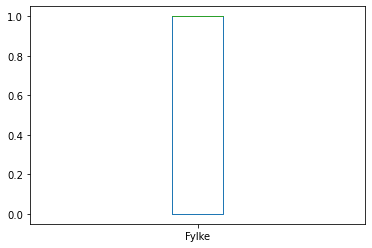

In [30]:
df['Fylke'].plot.box()

<AxesSubplot:>

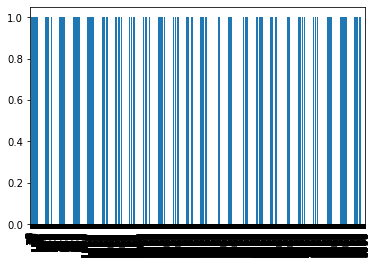

In [31]:
df['Fylke'].plot.bar()

In [32]:
df_fylke_count= df.groupby('Fylke').count()

In [33]:
df_fylke_count.Fylke

AttributeError: 'DataFrame' object has no attribute 'Fylke'

In [34]:
df_fylke_count.describe()

,TurId,Dato,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,2666.500000,2666.500000,2666.500000,2666.500000,2666.500000,2666.500000,2666.500000,2666.500000,2666.500000,2666.500000,2666.500000,2666.500000,2666.500000,2666.500000,2666.500000,2666.500000
std,1765.645633,1765.645633,1765.645633,1765.645633,1765.645633,1765.645633,1765.645633,1765.645633,1765.645633,1765.645633,1765.645633,1765.645633,1765.645633,1765.645633,1765.645633,1765.645633
min,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000
25%,2042.250000,2042.250000,2042.250000,2042.250000,2042.250000,2042.250000,2042.250000,2042.250000,2042.250000,2042.250000,2042.250000,2042.250000,2042.250000,2042.250000,2042.250000,2042.250000
50%,2666.500000,2666.500000,2666.500000,2666.500000,2666.500000,2666.500000,2666.500000,2666.500000,2666.500000,2666.500000,2666.500000,2666.500000,2666.500000,2666.500000,2666.500000,2666.500000
75%,3290.750000,3290.750000,3290.750000,3290.750000,3290.750000,3290.750000,3290.750000,3290.750000,3290.750000,3290.750000,3290.750000,3290.750000,3290.750000,3290.750000,3290.750000,3290.750000
max,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000,3915.000000


<AxesSubplot:xlabel='Fylke'>

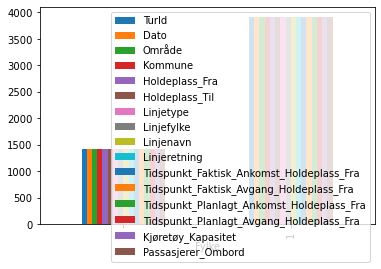

In [35]:
df_fylke_count.plot.bar()

In [36]:
df_fylke_count['Fylke'].plot.bar()

KeyError: 'Fylke'

In [37]:
df_fylke_count= df['Fylke'].value_counts()

In [38]:
df_fylke_count.describe()

count       2.000000
mean     2666.500000
std      1765.645633
min      1418.000000
25%      2042.250000
50%      2666.500000
75%      3290.750000
max      3915.000000
Name: Fylke, dtype: float64

<AxesSubplot:>

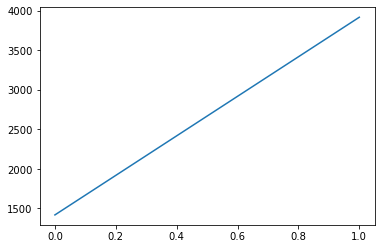

In [39]:
df_fylke_count.plot()

In [40]:
df_fylke_count.plot.Bar()

AttributeError: 'PlotAccessor' object has no attribute 'Bar'

<AxesSubplot:>

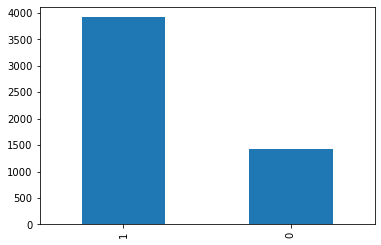

In [43]:
df_fylke_count.plot.bar()
#Her er 1 Viken og 0 alle andre

In [42]:
df.describe()

,Fylke,Område,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord
count,5333.000000,5333.000000,5333.000000,5333.000000,5333.000000
mean,0.734108,0.204763,0.475530,105.052503,5.601163
std,0.441848,0.403566,0.499448,24.255181,6.160011
min,0.000000,0.000000,0.000000,33.000000,0.000000
25%,0.000000,0.000000,0.000000,80.000000,1.000000
50%,1.000000,0.000000,0.000000,106.000000,4.000000
75%,1.000000,0.000000,1.000000,112.000000,8.000000
max,1.000000,1.000000,1.000000,151.000000,64.000000


In [44]:
df_fylke_count_2= df['Fylke'].value_counts()

In [45]:
df_fylke_count_2.describe()

count       2.000000
mean     2666.500000
std      1765.645633
min      1418.000000
25%      2042.250000
50%      2666.500000
75%      3290.750000
max      3915.000000
Name: Fylke, dtype: float64

<AxesSubplot:>

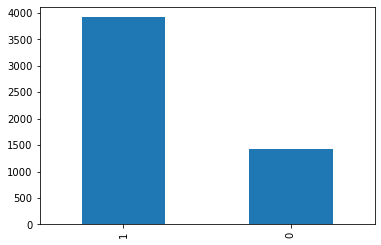

In [46]:
df_fylke_count_2.plot.bar()

In [47]:
df2=pd.read_csv(url, sep=';')

In [48]:
df_fylke_count_3 = df2['Fylke'].value_counts()

In [49]:
df_fylke_count_3.describe()

count       2.000000
mean     3000.000000
std      2067.580228
min      1538.000000
25%      2269.000000
50%      3000.000000
75%      3731.000000
max      4462.000000
Name: Fylke, dtype: float64

<AxesSubplot:>

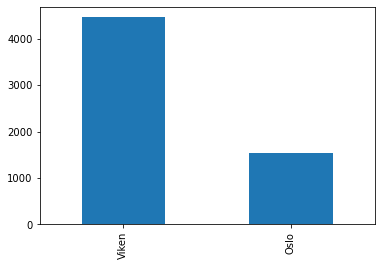

In [50]:
df_fylke_count_3.plot.bar()
#eller man kan gjøre slik, istedenfor 0 og 1 verdier, her uten å fjerne alle rader med negative passasjerverdier

In [51]:
#plotter med å fjerne rader med negative verdier for antall passasjerer, så skal vi få lik graf
df2 = df2[df2['Passasjerer_Ombord'] >= 0]  

In [52]:
df_fylke_count_3 = df2['Fylke'].value_counts()

<AxesSubplot:>

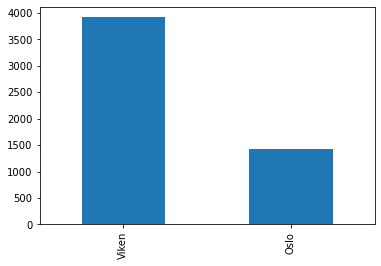

In [53]:
df_fylke_count_3.plot.bar()

In [54]:
#ser lik ut som vår graf med 0 og 1 verdier

In [55]:
df.describe()

,Fylke,Område,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord
count,5333.000000,5333.000000,5333.000000,5333.000000,5333.000000
mean,0.734108,0.204763,0.475530,105.052503,5.601163
std,0.441848,0.403566,0.499448,24.255181,6.160011
min,0.000000,0.000000,0.000000,33.000000,0.000000
25%,0.000000,0.000000,0.000000,80.000000,1.000000
50%,1.000000,0.000000,0.000000,106.000000,4.000000
75%,1.000000,0.000000,1.000000,112.000000,8.000000
max,1.000000,1.000000,1.000000,151.000000,64.000000


In [56]:
df2.describe()

,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord
count,5333.000000,5333.000000,5333.000000
mean,0.475530,105.052503,5.601163
std,0.499448,24.255181,6.160011
min,0.000000,33.000000,0.000000
25%,0.000000,80.000000,1.000000
50%,0.000000,106.000000,4.000000
75%,1.000000,112.000000,8.000000
max,1.000000,151.000000,64.000000


In [57]:
df_område_count = df2['Område'].value_counts()

<AxesSubplot:>

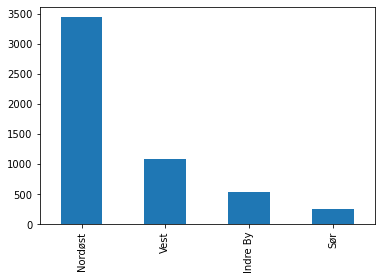

In [58]:
df_område_count.plot.bar()

In [59]:
df_kommune_count= df2['Kommune'].value_counts()

<AxesSubplot:>

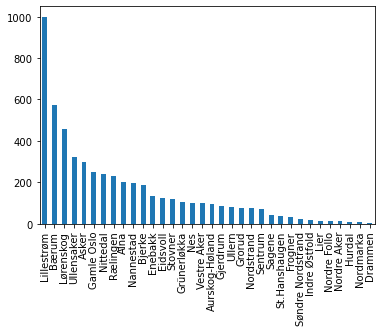

In [60]:
df_kommune_count.plot.bar()

In [61]:
df2.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [62]:
df_linjetype_count = df2['Linjetype'].value_counts()

<AxesSubplot:>

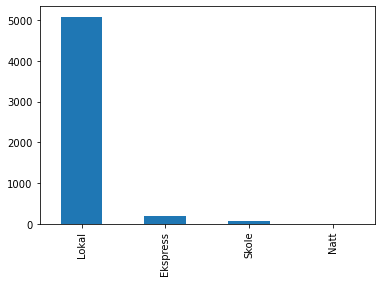

In [63]:
df_linjetype_count.plot.bar()

In [64]:
df_linjenavn_count = df2['Linjenavn'].value_counts()

<AxesSubplot:>

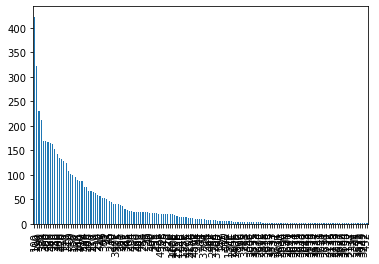

In [65]:
df_linjenavn_count.plot.bar()

In [66]:
#denne ble litt uoversiktelig

In [67]:
df_linjefylke_count =df2['Linjefylke'].value_counts()

<AxesSubplot:>

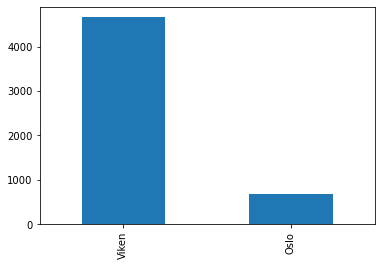

In [68]:
df_linjefylke_count.plot.bar()

In [69]:
#og det var 5 unike features